In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [179]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [122]:
inspector = inspect(engine)
i = inspector.get_columns('measurement')
j = inspector.get_columns('station')
i

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

# Exploratory Climate Analysis

<BarContainer object of 2223 artists>

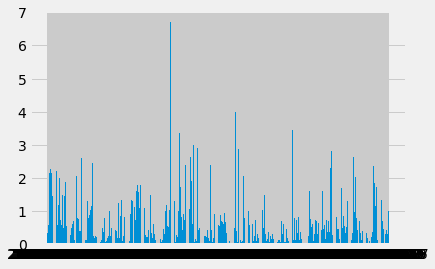

In [212]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# session.query(measurement.prcp)./filter
# Calculate the date 1 year ago from the last data point in the database
end_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date = dt.datetime(2017, 8, 23)
year = last_date - dt.timedelta(365)
# Perform a query to retrieve the data and precipitation scores
last_year_prcp = session.query(measurement.date, measurement.prcp).\
filter(measurement.date<=last_date).\
filter(measurement.date>=year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip = pd.DataFrame(last_year_prcp)
# Sort the dataframe by date
precip_sort = precip.sort_values(['date'])
precip_set = precip_sort.set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data
date = precip['date'].unique()

plt.bar(precip['date'], precip_set['prcp'])
# plt.xticks(rotation = 90)

In [120]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_set.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [175]:
# Design a query to show how many stations are available in this dataset?
session.query(station.id).count()

9

In [200]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stat = session.query(measurement.station, func.count(measurement.prcp)).filter(measurement.prcp>=0).group_by(measurement.station).order_by(desc(measurement.prcp)).all()
active_stat
                                                                                                                                                  

[('USC00513117', 2696),
 ('USC00518838', 342),
 ('USC00519523', 2572),
 ('USC00519281', 2772),
 ('USC00516128', 2484),
 ('USC00519397', 2685),
 ('USC00511918', 1932),
 ('USC00514830', 1937),
 ('USC00517948', 683)]

In [194]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_min = session.query(func.min(measurement.tobs)).filter(measurement.station=='USC00519281').all()
temp_min

[(54.0)]

In [193]:
temp_max = session.query(func.max(measurement.tobs)).filter(measurement.station=='USC00519281').all()
temp_max

[(85.0)]

In [195]:
temp_ave = session.query(func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()
temp_ave

[(71.66378066378067)]

In [203]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).order_by(desc(measurement.tobs)).all()

[('USC00519523', 2669),
 ('USC00517948', 1372),
 ('USC00516128', 2612),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00514830', 2202),
 ('USC00513117', 2709),
 ('USC00511918', 1979),
 ('USC00519397', 2724)]

Text(0.5, 1.0, 'Temperature Observations for Station USC00519281')

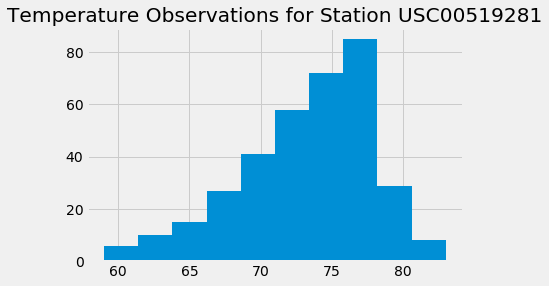

In [211]:
last_year_tobs = session.query(measurement.date, measurement.tobs).\
filter(measurement.station=='USC00519281').\
filter(measurement.date<=last_date).\
filter(measurement.date>=year).all()
tobs = pd.DataFrame(last_year_tobs)
plt.hist(tobs['tobs'])
plt.title('Temperature Observations for Station USC00519281')

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
